**Data Analysis for Amazon and Walmart Datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


**Load the Datasets**

In [ ]:
am_path = '/content/Amazon Customer Behavior Survey.csv'
am_data = pd.read_csv(am_path)
walmart_path = '/content/Walmart.csv'
walmart_data = pd.read_csv(walmart_path)

print("Amazon Dataset:")
print(am_data.head(), "\n")
print("Walmart Dataset:")
print(walmart_data.head())

Amazon Dataset:
                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1           

**Data Cleaning and Preparation**

In [ ]:
am_data = am_data.loc[:, ~am_data.columns.duplicated()]
print(f"Amazon dataset columns after removing duplicates: {list(am_data.columns)}")
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')


Amazon dataset columns after removing duplicates: ['Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']


**Exploratory Data Analysis**

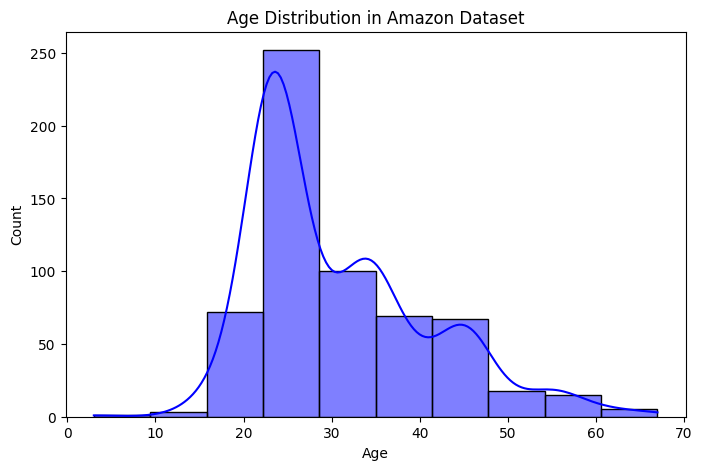

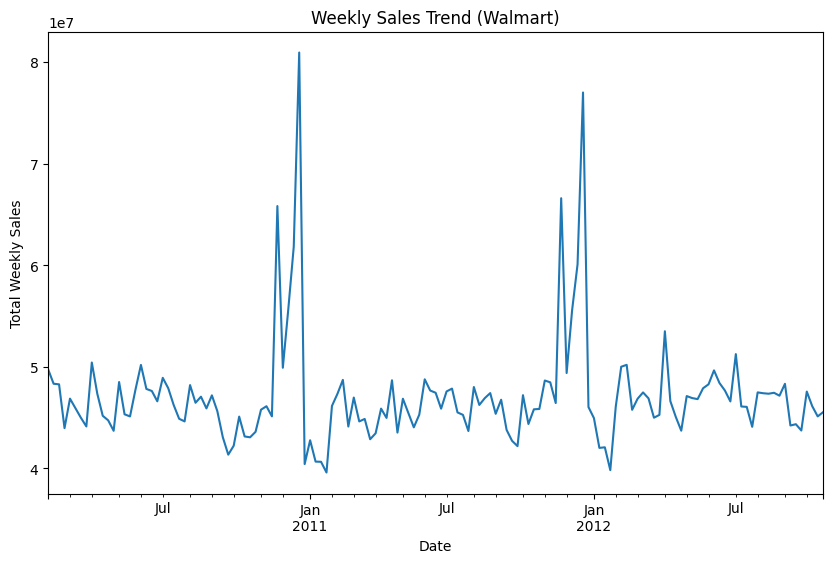

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(am_data['age'], bins=10, kde=True, color='blue')
plt.title("Age Distribution in Amazon Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
walmart_data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Weekly Sales Trend (Walmart)")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

**Demographic Profile of Customers Most Active in Making Purchases**

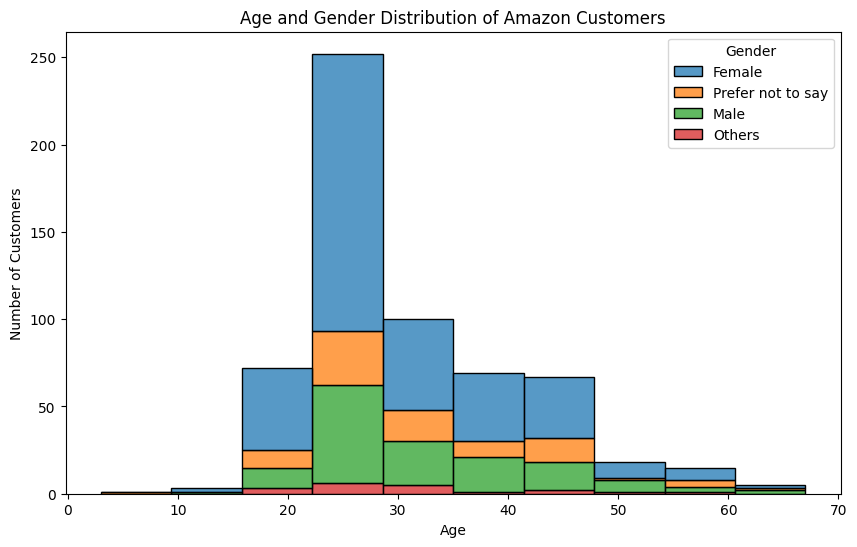

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=am_data, x='age', hue='Gender', multiple='stack', bins=10, kde=False)
plt.title("Age and Gender Distribution of Amazon Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

**Customer Preferences Regarding Products**

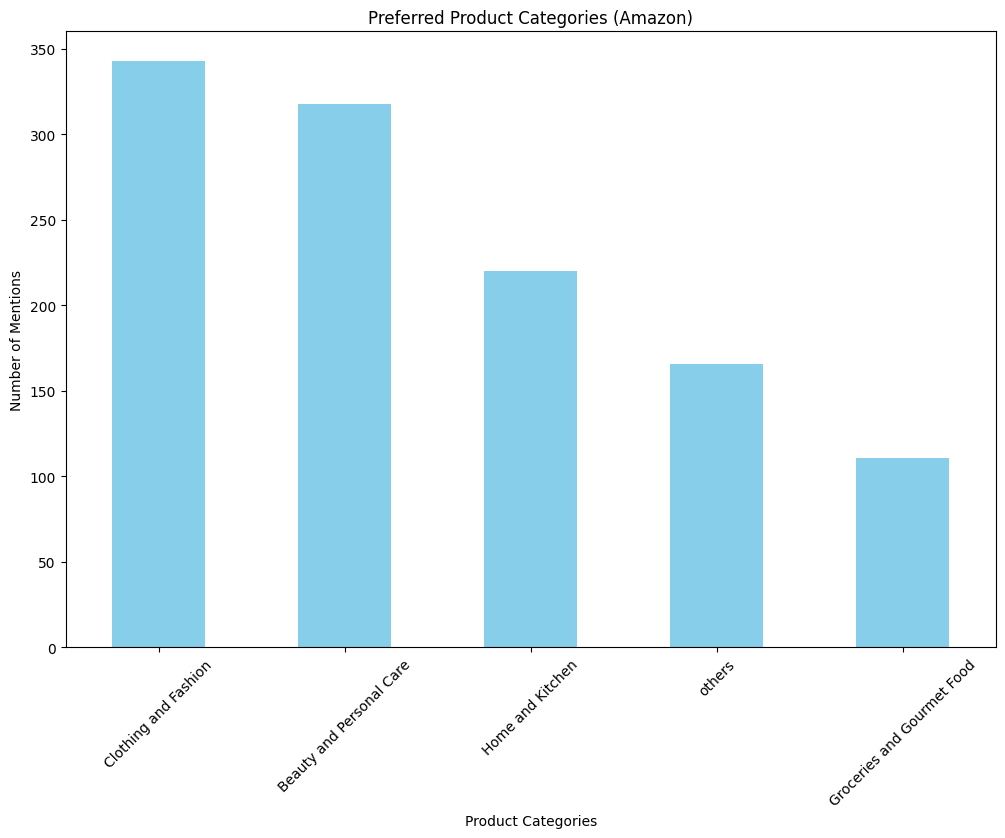

In [ ]:
categories = am_data['Purchase_Categories'].str.split(';').explode()
category_counts = categories.value_counts()

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Preferred Product Categories (Amazon)")
plt.xlabel("Product Categories")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()

**Seasonal Patterns in Customer Purchasing Behavior**

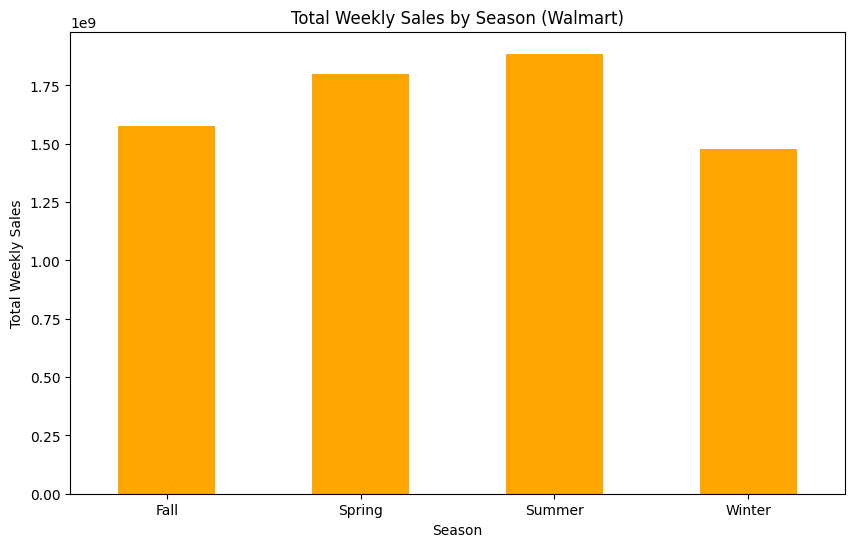

In [ ]:
walmart_data['Season'] = walmart_data['Date'].dt.month % 12 // 3 + 1
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
walmart_data['Season'] = walmart_data['Season'].map(season_labels)

seasonal_sales = walmart_data.groupby('Season')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind='bar', color='orange')
plt.title("Total Weekly Sales by Season (Walmart)")
plt.xlabel("Season")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=0)
plt.show()

**Influence of Discounts and Promo Codes**

In [ ]:
if 'Promo Code Usage' in am_data.columns:
    promo_data = am_data.groupby('Promo Code Usage')['Purchase_Frequency'].value_counts(normalize=True).unstack()
    promo_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    plt.title("Purchase Frequency by Promo Code Usage (Amazon)")
    plt.xlabel("Promo Code Usage")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Promo Code Usage column not found in dataset.")

Promo Code Usage column not found in dataset.


**Subscription Rates**

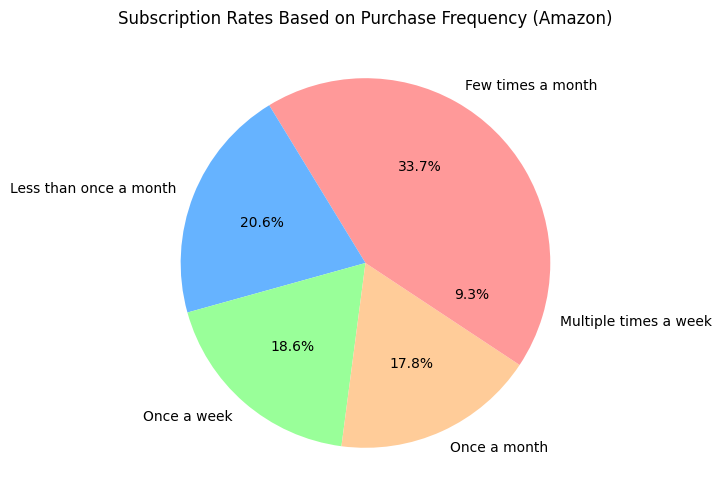

In [ ]:
subscription_rate = am_data['Purchase_Frequency'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
subscription_rate.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Subscription Rates Based on Purchase Frequency (Amazon)")
plt.ylabel("")
plt.show()

**Most Commonly Used Payment Methods**

In [ ]:
if 'Payment_Method' in am_data.columns:
    payment_methods = am_data['Payment_Method'].value_counts()

    plt.figure(figsize=(10, 6))
    payment_methods.plot(kind='bar', color='teal')
    plt.title("Most Commonly Used Payment Methods (Amazon)")
    plt.xlabel("Payment Method")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Payment Method column not found in dataset.")

Payment Method column not found in dataset.


Random Forest Model(Purchase Prediction)

In [ ]:
#Handle Missing Values (Fill with Mode)
am_data.fillna(am_data.mode().iloc[0], inplace=True)
label_enc = LabelEncoder()
for col in am_data.select_dtypes(include=['object']).columns:
    am_data[col] = label_enc.fit_transform(am_data[col])

In [ ]:
if 'Purchase_Frequency' in am_data.columns:
    X = am_data.drop(columns=['Purchase_Frequency'])  # Features
    y = am_data['Purchase_Frequency']  # Target Variable
else:
    print("Purchase_Frequency column not found in dataset. Exiting model training.")
    exit()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print("\n------ Model Evaluation ------")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



------ Model Evaluation ------
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.65      0.44        37
           1       0.54      0.61      0.57        23
           2       0.00      0.00      0.00        11
           3       0.38      0.14      0.21        21
           4       0.57      0.28      0.37        29

    accuracy                           0.40       121
   macro avg       0.36      0.34      0.32       121
weighted avg       0.41      0.40      0.37       121

Accuracy: 0.4049586776859504


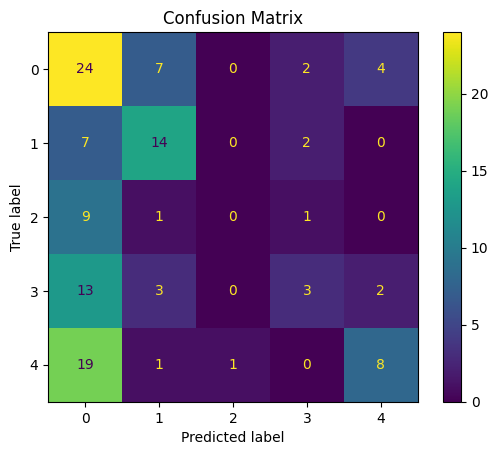

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

 K-Means Clustering or DBSCAN (for customer segmentation)

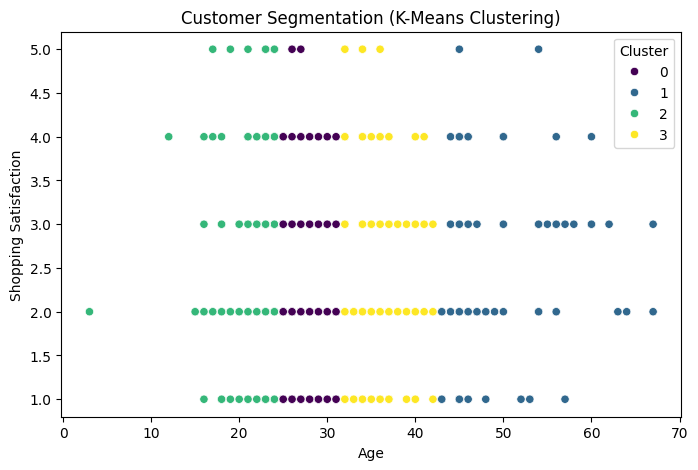

In [ ]:
from sklearn.cluster import KMeans
features = am_data[['age', 'Purchase_Frequency', 'Browsing_Frequency', 'Shopping_Satisfaction']]
kmeans = KMeans(n_clusters=4, random_state=42)
am_data['Cluster'] = kmeans.fit_predict(features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=am_data['age'], y=am_data['Shopping_Satisfaction'], hue=am_data['Cluster'], palette='viridis')
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Age")
plt.ylabel("Shopping Satisfaction")
plt.show()

Logistic Regression (Predicting Customer Churn)

In [ ]:
from sklearn.linear_model import LogisticRegression
X = am_data.drop(columns=['Shopping_Satisfaction', 'Timestamp'])
y = am_data['Shopping_Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.512396694214876

Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.53      0.54        19
           2       0.50      0.54      0.52        37
           3       0.54      0.69      0.61        45
           4       0.00      0.00      0.00        17
           5       0.33      0.33      0.33         3

    accuracy                           0.51       121
   macro avg       0.39      0.42      0.40       121
weighted avg       0.45      0.51      0.48       121



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ARIMA (Sales Forecasting)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
sales_data = walmart_data[['Date', 'Weekly_Sales']].set_index('Date')
arima_model = ARIMA(sales_data, order=(5,1,0))
arima_result = arima_model.fit()
forecast = arima_result.forecast(steps=10)
print("Sales Forecast (Next 10 Weeks):\n", forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

Sales Forecast (Next 10 Weeks):
 6435    752505.631160
6436    746684.569803
6437    740035.513446
6438    752786.655634
6439    743905.616137
6440    745981.225402
6441    744646.452798
6442    748945.607872
6443    744385.721145
6444    746855.488422
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


heatmap
wordcloud

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.ZdlOmwla5v/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.0ICgOfKtZt/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.hQ5qvCR55G/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [ ]:
import csv
import json
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.headless = True
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36")

driver = webdriver.Chrome(options=chrome_options)

# Open Blinkit
driver.get("https://www.blinkit.com")

try:
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    print("✅ Successfully loaded Blinkit!")

    # Scrape product names and prices (Update selectors as needed)
    products = driver.find_elements(By.CLASS_NAME, 'Product-name')  # Update class if necessary
    prices = driver.find_elements(By.CLASS_NAME, 'Product-price')  # Update class if necessary

    # Store data in a list
    scraped_data = []
    for i in range(min(len(products), len(prices))):
        product_name = products[i].text
        product_price = prices[i].text
        scraped_data.append({"Product": product_name, "Price": product_price})

    # Save to CSV
    csv_file = "blinkit_products.csv"
    with open(csv_file, "w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["Product", "Price"])
        writer.writeheader()
        writer.writerows(scraped_data)

    print(f"✅ Data saved to {csv_file}")

    # Save to JSON
    json_file = "blinkit_products.json"
    with open(json_file, "w", encoding="utf-8") as file:
        json.dump(scraped_data, file, indent=4)

    print(f"✅ Data saved to {json_file}")

except Exception as e:
    print("❌ Failed to scrape data:", e)

# Quit the driver
driver.quit()


❌ Failed to scrape data: name 'WebDriverWait' is not defined


In [ ]:
import csv
import json
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.headless = True
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36")

driver = webdriver.Chrome(options=chrome_options)

# Open BigBasket
driver.get("https://www2.hm.com/en_in/index.html")

try:
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    print("✅ Successfully loaded H&M!")

    # Scrape product names and prices (Update selectors as needed)
    products = driver.find_elements(By.CLASS_NAME, 'db7c79')  # Update class if necessary
    prices = driver.find_elements(By.CLASS_NAME, 'e357ce daf9dd fa94ab')  # Update class if necessary

    # Store data in a list
    scraped_data = []
    for i in range(min(len(products), len(prices))):
        product_name = products[i].text
        product_price = prices[i].text
        scraped_data.append({"Product": product_name, "Price": product_price})

    # Save to CSV
    csv_file = "H&M_products.csv"
    with open(csv_file, "w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["Product", "Price"])
        writer.writeheader()
        writer.writerows(scraped_data)

    print(f"✅ Data saved to {csv_file}")

    # Save to JSON
    json_file = "H&M_products.json"
    with open(json_file, "w", encoding="utf-8") as file:
        json.dump(scraped_data, file, indent=4)

    print(f"✅ Data saved to {json_file}")

except Exception as e:
    print("❌ Failed to scrape data:", e)

# Quit the driver
driver.quit()


❌ Failed to scrape data: name 'WebDriverWait' is not defined


In [ ]:
ws_path = '/content/ecom.csv'
ws_data = pd.read_csv(am_path)

print("Web Scraping Dataset:")
print(ws_data.head(), "\n")


Web Scraping Dataset:
                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1     

In [ ]:
_data = ws_data.loc[:, ~ws_data.columns.duplicated()]
print(f"Web scraped dataset columns after removing duplicates: {list(ws_data.columns)}")


Web scraped dataset columns after removing duplicates: ['Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']


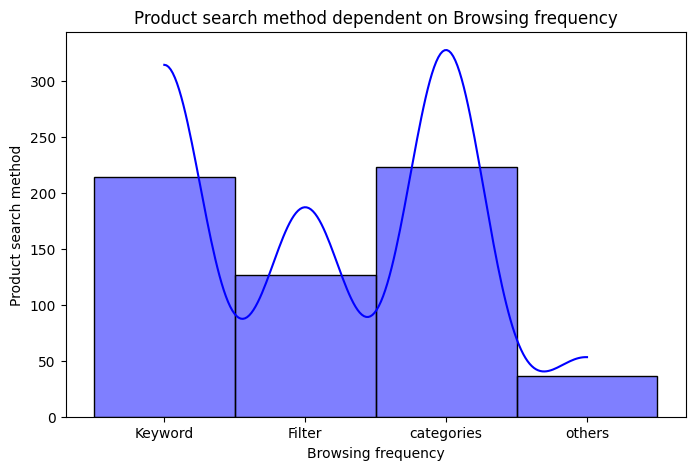

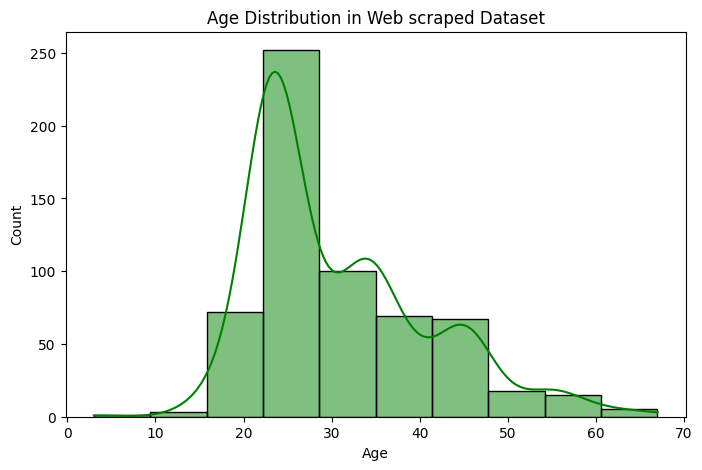

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(ws_data['Product_Search_Method'], bins=10, kde=True, color='blue')
plt.title("Product search method dependent on Browsing frequency")
plt.xlabel("Browsing frequency")
plt.ylabel("Product search method")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(ws_data['age'], bins=10, kde=True, color='green')
plt.title("Age Distribution in Web scraped Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=65)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=65)

In [ ]:
y_pred = rf_model.predict(X_test)
print("\n------ Model Evaluation ------")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



------ Model Evaluation ------
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.53      0.61        19
           2       0.51      0.76      0.61        37
           3       0.61      0.62      0.62        45
           4       0.80      0.24      0.36        17
           5       1.00      0.33      0.50         3

    accuracy                           0.59       121
   macro avg       0.73      0.49      0.54       121
weighted avg       0.63      0.59      0.57       121

Accuracy: 0.5867768595041323


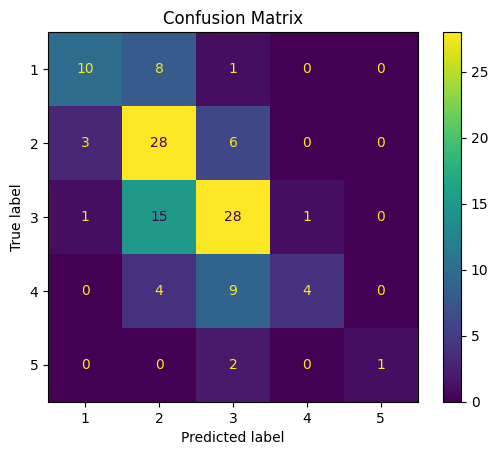

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()